In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
data = pd.read_csv("data.csv")

In [ ]:
profile = ProfileReport(data, title="Profiling Report")

In [ ]:
profile

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

In [ ]:
titulos = str
for titulo in data["Abstract"]:
    titulos = titulo + " " + str(titulos)
titulos

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
for p in punctuation:
    clean_texto = titulos.lower().replace(p,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")

In [ ]:
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

In [ ]:
lista_texto = clean_texto.split(" ")

palabras = []

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

In [ ]:
word_count={}
for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]

In [ ]:
df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

,freq
learning,2599
data,2251
machine,1845
proposed,1781
method,1576
based,1385
model,1372
classification,1340
using,1326
results,1317


In [ ]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

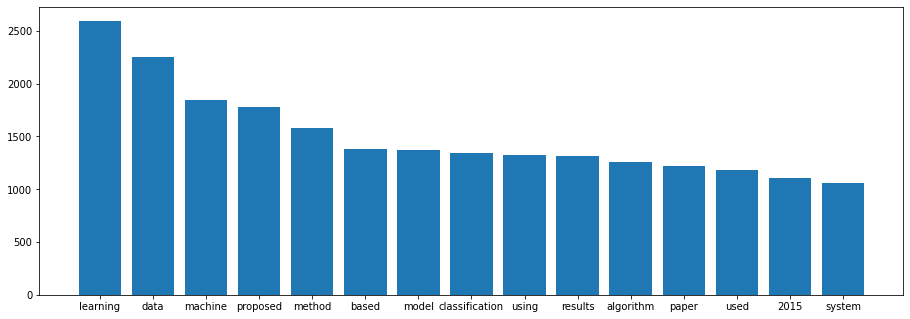

In [ ]:
plot_bar(data=df, top=15)

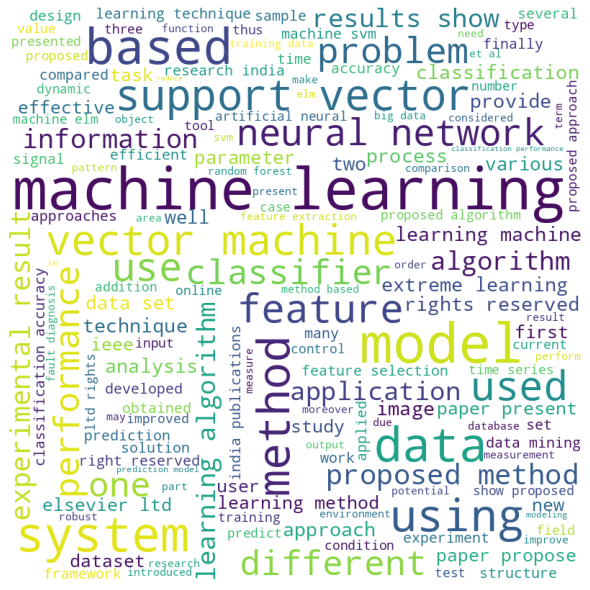

In [ ]:
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)
word_cloud.to_file("n1.png") 
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
data.head()

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,"Ge X., Tian H.",24775738600;57198556374;,On the influence of feature selection and extr...,2015,Journal of Computational Methods in Sciences a...,15,4,NaN,695,705,...,NaN,NaN,NaN,English,J. Comput. Methods Sci. Eng.,Article,Final,NaN,Scopus,2-s2.0-84954501458
1,"Panda S., Panda S.N., Nanda P., Mishra D.",57208846531;57216100122;56653561800;57197899524;,Comparative study on optimum design of rolling...,2015,Tribology International,92,NaN,NaN,595,604,...,NaN,TRBIB,NaN,English,Tribol Int,Article,Final,NaN,Scopus,2-s2.0-84940394577
2,"Fan M., Ma Q., Liu J., Wang Q., Wang Y., Duan X.",57056935200;35332370300;54410835800;5706444970...,Counting method of wheatear in field based on ...,2015,Nongye Jixie Xuebao/Transactions of the Chines...,46,NaN,NaN,234,239,...,NaN,NUYCA,NaN,Chinese,Nongye Jixie Xuebao,Article,Final,NaN,Scopus,2-s2.0-84954309908
3,"Zhao Y., Zeng S., Huang Y., Afzal R.M., Zhang X.",55357982000;36171394100;57189602859;5703511710...,Estimation of Heat Capacity of Ionic Liquids U...,2015,Industrial and Engineering Chemistry Research,54,51,NaN,12987,12992,...,NaN,IECRE,NaN,English,Ind. Eng. Chem. Res.,Article,Final,NaN,Scopus,2-s2.0-84952922290
4,"Decost B.L., Holm E.A.",56809377400;7102446164;,A computer vision approach for automated analy...,2015,Computational Materials Science,110,NaN,NaN,126,133,...,NaN,CMMSE,NaN,English,Comput Mater Sci,Article,Final,"All Open Access, Hybrid Gold",Scopus,2-s2.0-84940385885


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
